# ライブラリー読み込み

In [118]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import japanize_matplotlib
import datetime

DATE_FMT = '%Y%m%d%H%M'
pd.set_option('display.max_columns', 50)
%matplotlib inline

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

# データ読み込み

In [73]:
work_dir = Path().resolve().parent
data_dir = work_dir / 'data'
result_dir = work_dir / 'result'

In [74]:
# データ読み込み
df = pd.read_csv(data_dir / 'todofuken.csv')
df['ymd'] = pd.to_datetime(df['ymd'])
df = df.set_index('ymd')
print(df.shape)
df

(640, 47)


北海道          青森県        岩手県          宮城県          秋田県  \
ymd                                                                        
2020-04-01   66.886244    98.740386  55.238563     2.244063    63.985643   
2020-04-02   24.191253    95.955038  76.747322    25.130549    49.876466   
2020-04-03   85.634394    57.002651  96.819431    25.930741    97.529042   
2020-04-04   94.184999    47.953428  48.493037    55.919300    46.248474   
2020-04-05   24.755180    57.012872  68.229730     6.814276    16.523317   
...                ...          ...        ...          ...          ...   
2021-12-27 -774.143069 -7605.734918 -63.576269  2355.071653 -5700.641898   
2021-12-28 -774.143069 -7605.734918 -63.576269  2355.071653 -5700.641898   
2021-12-29 -774.143069 -7605.734918 -63.576269  2355.071653 -5700.641898   
2021-12-30 -774.143069 -7605.734918 -63.576269  2355.071653 -5700.641898   
2021-12-31 -774.143069 -7605.734918 -63.576269  2355.071653 -5700.641898   

                    山形県          福島県          茨城県          栃木県          群馬県  \
ymd                                                                           
2020-04-01    30.604826    87.151131    67.135718    92.109104    31.997800   
2020-04-02    44.845638    79.915805    77.514163    36.633568    47.263527   
2020-04-03    22.541114    80.931222    72.256434    36.246617    27.931420   
2020-04-04    27.542573    59.755348    74.021341    20.064499    95.878310   
2020-04-05    80.315978    86.168119    56.117824    75.946868    55.865967   
...                 ...          ...          ...          ...          ...   
2021-12-27  4836.933692 -1213.402147 -1421.461685 -2803.182614  5678.692557   
2021-12-28  4836.933692 -1213.402147 -1421.461685 -2803.182614  5678.692557   
2021-12-29  4836.933692 -1213.402147 -1421.461685 -2803.182614  5678.692557   
2021-12-30  4836.933692 -1213.402147 -1421.461685 -2803.182614  5678.692557   
2021-12-31  4836.933692 -1213.402147 -1421.461685 -2803.182614  5678.692557   

                    埼玉県          千葉県          東京都         神奈川県           新潟県  \
ymd                                                                            
2020-04-01    44.618782    54.426344    21.796233    64.534196     11.509251   
2020-04-02    67.777399     6.035251    73.364123    61.101851     51.948350   
2020-04-03    18.506380    37.160259    58.149631    51.476348     59.461406   
2020-04-04    30.496148    95.753617     0.169612    72.908207     93.267705   
2020-04-05    43.622256    42.583208    38.602608    74.142926     98.704388   
...                 ...          ...          ...          ...           ...   
2021-12-27 -2252.615085  3903.466009 -2273.158387  1876.623516  12660.420610   
2021-12-28 -2252.615085  3903.466009 -2273.158387  1876.623516  12660.420610   
2021-12-29 -2252.615085  3903.466009 -2273.158387  1876.623516  12660.420610   
2021-12-30 -2252.615085  3903.466009 -2273.158387  1876.623516  12660.420610   
2021-12-31 -2252.615085  3903.466009 -2273.158387  1876.623516  12660.420610   

                    富山県          石川県          福井県          山梨県          長野県  \
ymd                                                                           
2020-04-01    18.796954    42.829016    65.231635    24.638232    75.700569   
2020-04-02    65.293329    86.737380    97.905861    50.841131    93.814298   
2020-04-03    91.175317    35.729222     6.825720    76.300453    64.056170   
2020-04-04    93.076803    50.861719     8.376868    60.136855     4.390472   
2020-04-05    66.291353    13.068518    44.802494     5.341712    37.573586   
...                 ...          ...          ...          ...          ...   
2021-12-27  7236.827461 -5525.319595 -7569.988377 -1667.511595 -9620.476100   
2021-12-28  7236.827461 -5525.319595 -7569.988377 -1667.511595 -9620.476100   
2021-12-29  7236.827461 -5525.319595 -7569.988377 -1667.511595 -9620.476100   
2021-12-30  7236.827461 -5525.319595 -7569.988377 -1667.511595 -9620.476100   
2021-12-31  7

In [75]:
area0 = ['大阪府', '兵庫県']
area1 = ['東京都', '愛知県']

df_area0 = df[area0].sum(axis=1)
df_area1 = df[area1].sum(axis=1)

# EDA

<Axes: xlabel='ymd'>

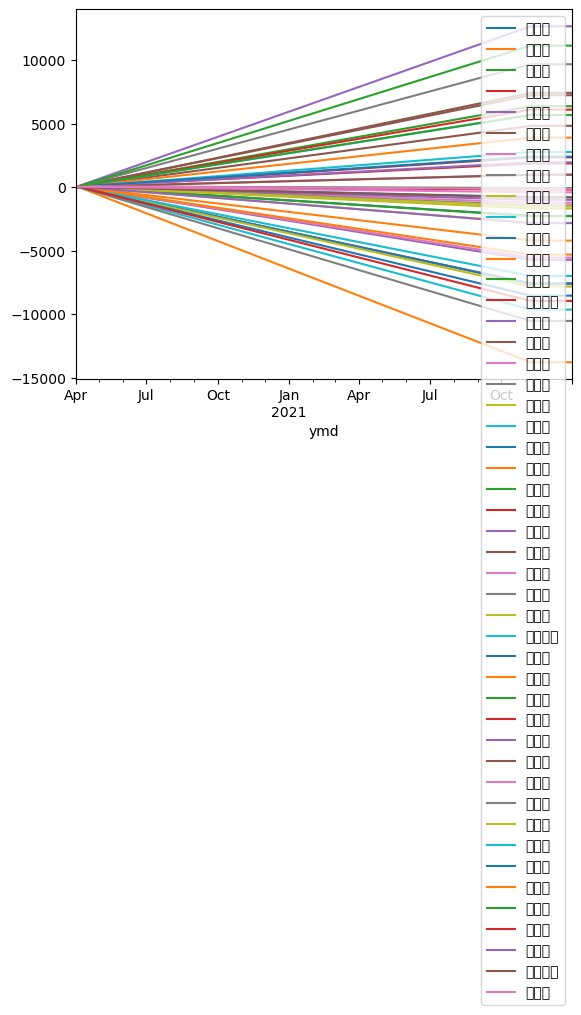

In [76]:
df.plot()

# モデル学習、予測

In [146]:
# 関数定義

# 季節性考慮パラメーターを設定
SEASONALITY_SETTINGS = {
    'yearly_seasonality': True,
    'weekly_seasonality': True,
    'daily_seasonality': False
}

# モデルに共変量を設定する
def add_regressors(model, regressors):
    for reg in regressors:
        model.add_regressor(reg)
        
# モデルに祝日カレンダーを追記して、共変量を設定
def gen_prophet(
    params, 
    seasonality_settings=SEASONALITY_SETTINGS,
    add_country_holidays=True, regressors=[]
    ):
    m = Prophet(**params, **seasonality_settings)
    if add_country_holidays:
        m.add_country_holidays(country_name='JP') # 日本の祝日を追加
    # モデルに共変量を設定
    add_regressors(m, regressors)
    return m

def grid_search(df, error_metric='mape', regressors=[]):
    """
    パラメータのグリッドサーチ
    https://facebook.github.io/prophet/docs/diagnostics.html
    """
    
    error_metrics = []
    param_grid = {
        'changepoint_range': [0.8,0.9,1.0],
        'changepoint_prior_scale': [0.001,0.01,0.05,0.08,0.1,0.5,0.8,1.0],
        'seasonality_prior_scale': [0.01,0.1,0.5,1.0,5.0,10.0,20],
        'seasonality_mode': ['additive','multiplicative'],
        'interval_width': [0.9] # これは予測精度には影響しない
    }
    
    # パラメータの全組み合わせを作成
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    
    # クロスバリデーションで評価
    for params in all_params:
        m = gen_prophet(params)
        m.fit(df)
        df_cv = cross_validation(
            m,
            initial = initial,
            horizon = horizon,
            period = period,
            parallel = 'processes' 
        )
        df_p = performance_metrics(df_cv, rolling_window=1)
        error_metrics.append(df_p[error_metric].values[0])
    
    # best parametersを探索
    tuning_results = pd.DataFrame(all_params)
    tuning_results[error_metric] = error_metrics
    return tuning_results

# best parametersを取得
def get_best_params(search_result, error_metric='mape'):
    return search_result.iloc[search_result[error_metric].idxmin(), :-1].to_dict()

def prophet_plot(m, fcst, ax=None, uncertainty=True, plot_cap=True, 
                 xlabel='ds', ylabel='y', figsize=(10,6)):
    """Plot the Prophet forecast.
    Parameters
    -------
    m: Prophet model.
    fcst: pd.DataFrame output of m.predict
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals, which will
        only be done if m.uncertainty_samples > 0.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, heght in inches.
    Returns
    -------
    A matplotlib figure.
    """
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax =fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2')
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty and m.uncertainty_samples:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                       color='#0072B2', alpha=0.2)
    # Specify formatting to workaround matplotlib issue #12925
    locator = AutoDateLocator(interval_multiples=False)
    formatter = AutoDateFormatter(locator)
    
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig
    
def forcast_all_period(model, df_test):
    future = model.make_future_dataframe(period=len(df_test))
    return model.predict(future)
    
def plot_prophet_forecast(model, df_test, df_forecast, title='', y_label=''):
    fig = prophet_plot(model, df_forecast)
    ax = fig.gca()
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('日付', fontsize=15)    
    ax.set_ylabel(y_label, fontsize=15)
    plt.scatter(df_test.ds, df_test.y, marker='.', c='#b24000')
    plt.show()
    
def plot_prophet_components(model, df_forecast):
    model.plot_components(df_forecast)
    plt.show()
    
def train_prophet(df, params, regressors=[]):
    m = gen_prophet(params, regressors=regressors)
    m.fit(df)
    return m

def eval_prophet(df, model):
    df = df.drop('y', axis=1)
    df_forecast = model.predict(df)
    return df_forecast

def ci_rate_cumsum(df_forecast, direction='upper'):
    s = df_forecast.sum(axis=0)
    return (s[f'yhat_{direction}'] - s['yhat']) / s['yhat']

def summary_prediction(df_test, df_forecast, 
                       error_func=mean_absolute_percentage_error):
    error = error_func(df_test['y'], df_forecast['yhat'])
    ci_rate_upper = ci_rate_cumsum(df_forecast, direction='upper')
    ci_rate_lower = ci_rate_cumsum(df_forecast, direction='lower')
    return {
        'error': error,
        'ci_rate_upper': ci_rate_upper,
        'ci_rate_lower': ci_rate_lower
    }
    
def plot_prophet_forecast_pred(model, df_test, 
                               df_forecast, title='', y_label=''):
    fig = prophet_plot(model, df_forecast)
    ax = fig.gca()
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('日付', fontsize=15)    
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlim(datetime.date(2021, 9, 15), datetime.date(2021, 10, 29))
    plt.scatter(df_test.ds, df_test.y, marker='.', c='#b24000')
    plt.show()
    
# プロモ前期間とプロモ開始以降の期間に分ける（trainとtest）
def make_train_test_df(df_kensyo, df_taisyo, 
                       start_date, kainyu_date, end_date):
    # データの開始日
    start_date = datetime.datetime.strptime(start_date, '%Y%m%d')
    # プロモの開始日
    kainyu_date = datetime.datetime.strptime(kainyu_date, '%Y%m%d')
    
    # モデルで予測する最終日
    end_date = datetime.datetime.strptime(end_date, '%Y%m%d')
    pre_days = (end_date - kainyu_date).days
    days = (kainyu_date - start_date).days
    df_fbp = pd.concat([df_kensyo, df_taisyo], axis=1).reset_index().rename(
        columns= {
            'ymd':'ds',
            0:'y',
            1:'x'
        }
    )
    
    df_train = df_fbp.query('ds < @kainyu_date')
    df_test = df_fbp.query('ds >= @kainyu_date')[:pre_days]  
    df_fbp= df_fbp.query('ds < @end_date')  
    
    return df_fbp, df_train, df_test

def plot_one_prophet_and_one_real(m, fcst, pred_period, series,uncertainty=True,
                                 xlabel='日付',ylabel1='KPI', ylabel2='最適化によるKPI増減の推定値',
                                 ylabel3='最適化によるKPI増減の推定値（累積値）',
                                 title='検証によるKPIへの影響', figsize=(15, 9)):
    """
    介入なしを仮定したProphetの予測と介入ありの実測値の差（影響）をプロットする関数
    """
    title_fontsize = 16
    font_size = 12
    pred_days = (pred_period[1] - pred_period[0]).days+1
    fig = plt.figure(facecolor='w', figsize=figsize)
    
    ax = fig.add_subplot(311)
    fcst_t = fcst['ds'].dt.to_pydatetime()
    true_line, = ax.plot(fcst_t, 
                        series.loc[fcst['ds'].values[0]:fcst['ds'].values[-1]], 'k')
    true_line.set_label('実測値')
    counterfactual_pred_line, = ax.plot(fcst_t, fcst['yhat'], ls='--', c='#0072B2')
    counterfactual_pred_line.set_label('最適化していなかった場合の予測値')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'], 
                       color='#0072B2', alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel, fontsize=font_size)
    ax.set_ylabel(ylabel1, fontsize=font_size)
    ax.set_title(title, fontsize=font_size)
    ax.legend(loc='upper left', fontsize=font_size)
    ax.axvline(x=pred_period[0], color='black', ls='--')
    
    ax2 = fig.add_subplot(312)
    counterfactual_pred_effect_line, = ax2.plot(fcst_t, 
                                               series.loc[fcst['ds'].values[0]:fcst['ds'].values[-1]].values-fcst['yhat'].values, ls='--', c='#0072B2')
    counterfactual_pred_effect_line.set_label('最適化によるKPI増減の推定値')
    
    if uncertainty:
        ax2.fill_between(fcst_t, 
                         series.loc[fcst['ds'].values[0]:fcst['ds'].values[-1]].values-fcst['yhat_lower'].values,
                         series.loc[fcst['ds'].values[0]:fcst['ds'].values[-1]].values-fcst['yhat_upper'].values,
                         color='#0072B2', alpha=0.2)
    ax2.set_xlabel(xlabel, fontsize=font_size)
    ax2.set_ylabel(ylabel2, fontsize=font_size)
    ax2.axhline(y=0, color='black', ls='--')
    ax2.axvline(x=pred_period[0], color='black', ls='--')
    ax2.legend(loc='upper left', fontsize=font_size)
    
    ax3 = fig.add_subplot(313)
    diff = series.loc[fcst['ds'].values[0]:fcst['ds'].values[-1]][-pred_days:].values -fcst['yhat'][-pred_days:].values
    lower_diff = fcst['yhat'][-pred_days:].values-fcst['yhat_lower'][-pred_days:].values
    upper_diff = fcst['yhat_upper'][-pred_days:].values-fcst['yhat'][-pred_days:].values
    counterfactual_pred_effect_accum_line, = ax3.plot(fcst_t[-pred_days:], (series.loc[fcst['ds'].values[0]:fcst['ds'].values[-1]][-pred_days:].values- fcst['yhat'][-pred_days:].values).cumsum(), ls='--', c='#0072B2')
    counterfactual_pred_effect_accum_line.set_label('最適化によるKPI増減の推定値：累積')
    if uncertainty:
        ax3.fill_between(fcst_t[-pred_days:], 
                         (series.loc[fcst['ds'].values[0]:fcst['ds'].values[-1]].values-fcst['yhat_lower'][-pred_days:].values).cumsum(),
                         (series.loc[fcst['ds'].values[0]:fcst['ds'].values[-1]].values-fcst['yhat_upper'][-pred_days:].values).cumsum(),
                         color='#0072B2', alpha=0.2
                        )
    ax3.set_xlabel(xlabel, fontsize=font_size)
    ax3.set_ylabel(ylabel3, fontsize=font_size)
    ax3.axhline(y=0, color='black', ls='--')
    ax3.axvline(x=pred_period[0], color='black', ls='--')
    ax3.legend(loc='upper left', fontsize=font_size)
    fig.tight_layout()
    
    return fig, diff, lower_diff, upper_diff    

In [147]:
# 日付を設定
start_date = '20200401' # データの開始日
kainyu_date = '20210401'  # プロモ開始日
end_date = '20210501'  # モデルで予測する最終日

# 予測日数（horizon）を算出
pre_days = (datetime.datetime.strptime(end_date, '%Y%m%d') - datetime.datetime.strptime(kainyu_date, '%Y%m%d')).days

df_fbp, df_train, df_test = make_train_test_df(df_area0, df_area1, start_date, kainyu_date, end_date)

In [148]:
df_train, df_test

(            ds            y            x
 0   2020-04-01    56.176696    32.937840
 1   2020-04-02   117.731899   112.034264
 2   2020-04-03    83.239157    61.804890
 3   2020-04-04   119.530704     8.774351
 4   2020-04-05   145.766193   119.115920
 ..         ...          ...          ...
 360 2021-03-27  6583.494061  2540.579109
 361 2021-03-28  6601.591840  2547.488734
 362 2021-03-29  6619.689620  2554.398359
 363 2021-03-30  6637.787399  2561.307983
 364 2021-03-31  6655.885180  2568.217608
 
 [365 rows x 3 columns],
             ds            y            x
 365 2021-04-01  6673.982959  2575.127233
 366 2021-04-02  6692.080738  2582.036858
 367 2021-04-03  6710.178519  2588.946483
 368 2021-04-04  6728.276298  2595.856108
 369 2021-04-05  6746.374077  2602.765732
 370 2021-04-06  6764.471858  2609.675357
 371 2021-04-07  6782.569637  2616.584982
 372 2021-04-08  6800.667417  2623.494606
 373 2021-04-09  6818.765197  2630.404231
 374 2021-04-10  6836.862976  2637.313855
 375 20

In [149]:
# モデル学習

# 学習期間と予測期間を設定
initial = '210 days'
horizon = '{} days'.format(pre_days)
period = '60 days'
print('horizon:' + horizon)

horizon:30 days


In [150]:
# Gridsearchのよるハイパーパラメーターチューニング
search_result = grid_search(df_train, regressors=['x'])

21:12:24 - cmdstanpy - INFO - Chain [1] start processing
21:12:24 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
21:12:24 - cmdstanpy - INFO - Chain [1] start processing
21:12:24 - cmdstanpy - INFO - Chain [1] start processing
21:12:24 - cmdstanpy - INFO - Chain [1] start processing
21:12:24 - cmdstanpy - INFO - Chain [1] done processing
21:12:24 - cmdstanpy - INFO - Chain [1] done processing
21:12:24 - cmdstanpy - INFO - Chain [1] done processing
21:12:24 - cmdstanpy - INFO - Chain [1] start processing
21:12:24 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
21:12:24 - cmdstanpy - INFO - Chain [1] start processing
21:12:24 - cmdstanpy - INFO - Chain [1] start processing
21:12:24 - cmdstanpy - INFO - Chain [1] start processing
21:12:24 - cmdstanpy - INFO - Chain [1] done processing


KeyboardInterrupt: 

In [82]:
# best_params:
best_params = get_best_params(search_result)
best_params

{'changepoint_range': 0.9,
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 20.0,
 'seasonality_mode': 'additive',
 'interval_width': 0.9}

In [83]:
# best_paramsを保存
import pickle

save_date = datetime.datetime.now().strftime(DATE_FMT)

with open(result_dir / f'best_params_{save_date}.bf', 'wb') as fp:
    pickle.dump(best_params, fp)

In [84]:
# 過去のbest_paramを呼び出し
import pickle

pkl_name = 'best_params_202309091906'

with open(result_dir / f'{pkl_name}.bf', 'rb') as rp :
    best_params = pickle.load(rp)

best_params

{'changepoint_range': 0.9,
 'changepoint_prior_scale': 0.01,
 'seasonality_prior_scale': 20.0,
 'seasonality_mode': 'additive',
 'interval_width': 0.9}

In [103]:
# best_paramを使ってモデル学習
model = train_prophet(df_train, best_params, regressors=['x'])

# 予測値を得る
df_forecast = eval_prophet(df_test, model)

# 予測の信頼区間とプロモ期間のMAPEを算出
summary_prediction(df_test, df_forecast.iloc[:,1:])

19:38:54 - cmdstanpy - INFO - Chain [1] start processing
19:38:54 - cmdstanpy - INFO - Chain [1] done processing


{'error': 0.00010011160779988553,
 'ci_rate_upper': 0.00039498720884405036,
 'ci_rate_lower': -0.0003963848573556357}

In [108]:
# プロモ開始以降の検証エリア値とモデル予測値の誤差を算出
df_for = df_test[['ds', 'y']]
df_for['yhat'] = df_forecast['yhat'].values
df_for.set_index('ds', drop=True, inplace=True)
nq_ratio = df_for['y'].sum() / df_for['yhat'].sum()
print(f'増減率は{nq_ratio}')

増減率は1.0000953735135758


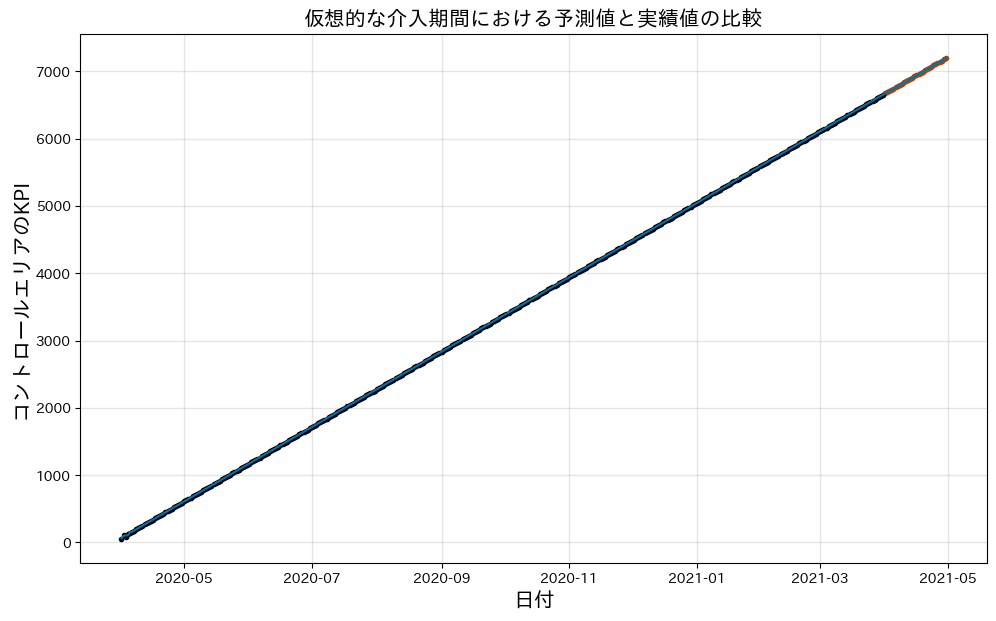

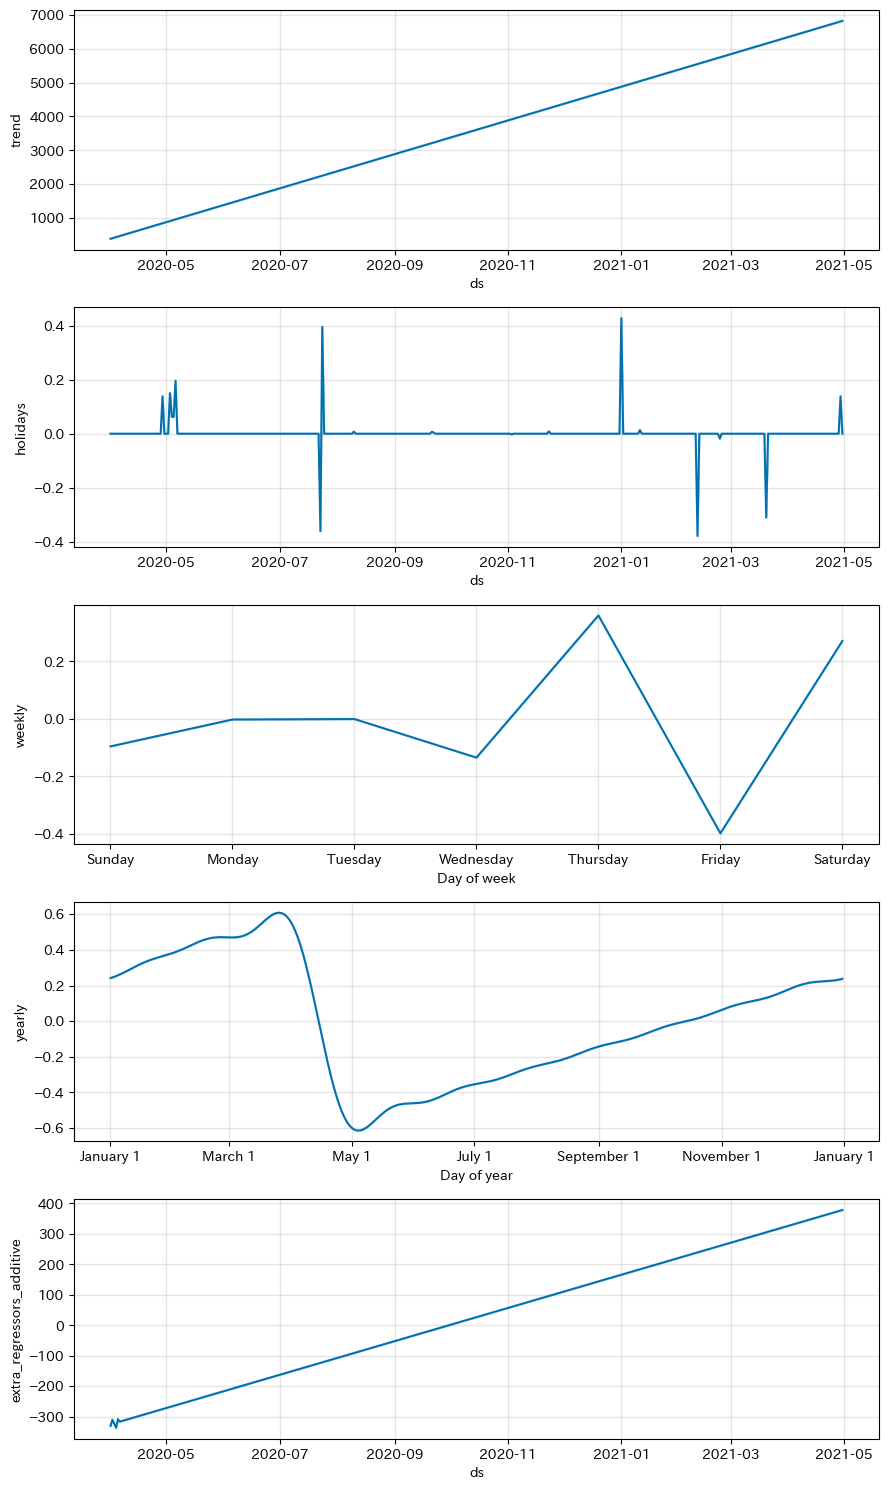

In [120]:
# 予測結果をグラフ化
df_forecast_all = eval_prophet(df_fbp, model)
plot_prophet_forecast(model, df_test, df_forecast_all, 
                      title='仮想的な介入期間における予測値と実績値の比較', y_label='コントロールエリアのKPI')
plot_prophet_components(model, df_forecast_all)

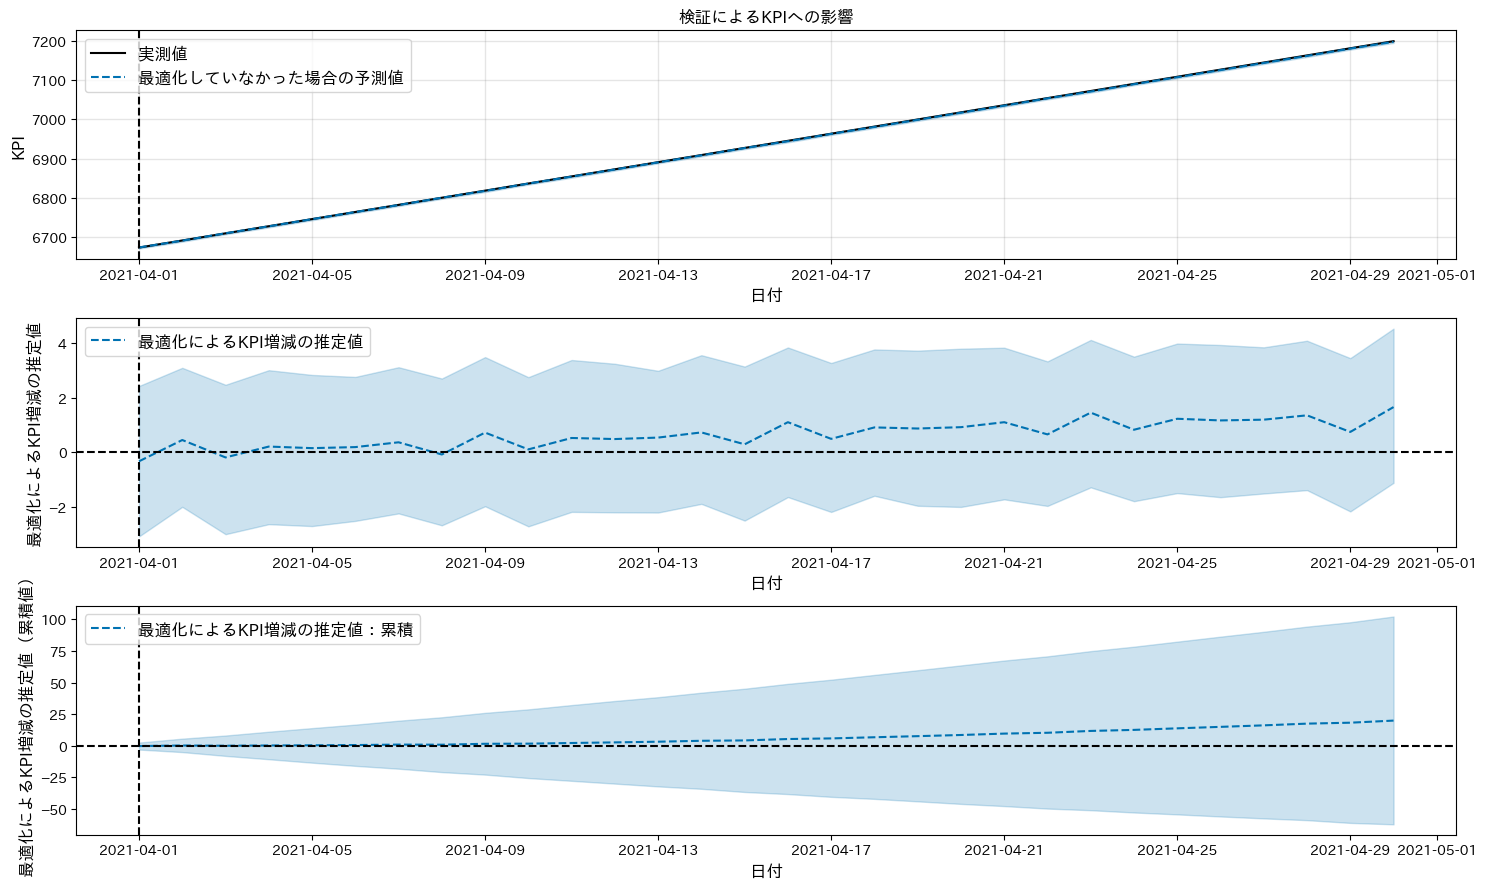

In [151]:
# 計測結果の描画
pred_period = [pd.Timestamp(kainyu_date), pd.Timestamp(end_date)]

_, diff, lower_diff, upper_diff = plot_one_prophet_and_one_real(model, df_forecast, pred_period, df_fbp.set_index('ds')['y'])